In [150]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
import spacy
import nltk
import re
from spacy.tokens import Doc
from sklearn.decomposition import LatentDirichletAllocation

In [141]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 5.4 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [31]:
train_data= load_files("/Users/macbookair/Desktop/aclImdb/train")
test_data= load_files("/Users/macbookair/Desktop/aclImdb/test")

In [32]:
text_train, y_train = train_data.data, train_data.target
text_test, y_test= test_data.data, test_data.target

In [36]:
text_train = np.array(text_train)[y_train != 2]
y_train= y_train[y_train != 2]


In [37]:
print("type of text_train: ", type(text_train))
print("length of text_train: ", len(text_train))
print(text_train[1])


type of text_train:  <class 'numpy.ndarray'>
length of text_train:  25000
b'If you want Scream or anything like the big-studio horror product that we get forced on us these days don\'t bother. This well-written film kept me up thinking about all it had to say. Importance of myth in our lives to make it make sense, how children interpret the world (and the violence in it), our ransacking of the environment and ignorance of its history and legends.. all here, but not flatly on the surface. You could technically call it a "monster movie" even though the Wendigo does not take physical form until the end, and then it\'s even up to you and your beliefs as to what\'s happening with the legendary spirit/beast. Some standard thriller elements for those looking just for the basics and the film never bores, though in fact the less you see of the creature, the better. Fessenden successfully continues George Romero\'s tradition of using the genre as parable and as a discussion forum while still kee

In [38]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]
print(text_train[1])


b'If you want Scream or anything like the big-studio horror product that we get forced on us these days don\'t bother. This well-written film kept me up thinking about all it had to say. Importance of myth in our lives to make it make sense, how children interpret the world (and the violence in it), our ransacking of the environment and ignorance of its history and legends.. all here, but not flatly on the surface. You could technically call it a "monster movie" even though the Wendigo does not take physical form until the end, and then it\'s even up to you and your beliefs as to what\'s happening with the legendary spirit/beast. Some standard thriller elements for those looking just for the basics and the film never bores, though in fact the less you see of the creature, the better. Fessenden successfully continues George Romero\'s tradition of using the genre as parable and as a discussion forum while still keeping us creeped out.'


In [39]:
print(np.bincount(y_train))

[12500 12500]


In [ ]:
vect = CountVectorizer(min_df= 5, stop_words= "english") # min_df argument adjust the minimum number of documents in which a token needs to appear
vect.fit(text_train)
print(len(vect.vocabulary_))


74849


In [41]:
sorted(vect.vocabulary_.items(), key= lambda x: x[1], reverse= True)

[('üvegtigris', 74848),
 ('über', 74847),
 ('østbye', 74846),
 ('ísnt', 74845),
 ('ís', 74844),
 ('êxtase', 74843),
 ('évery', 74842),
 ('étc', 74841),
 ('état', 74840),
 ('était', 74839),
 ('émigrés', 74838),
 ('émigré', 74837),
 ('élan', 74836),
 ('écran', 74835),
 ('æsthetic', 74834),
 ('åmål', 74833),
 ('åge', 74832),
 ('äänekoski', 74831),
 ('ääliöt', 74830),
 ('är', 74829),
 ('âme', 74828),
 ('ángela', 74827),
 ('ángel', 74826),
 ('ánd', 74825),
 ('álvaro', 74824),
 ('álex', 74823),
 ('zé', 74822),
 ('zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz', 74821),
 ('zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz', 74820),
 ('zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz', 74819),
 ('zzzzzzzzzzzzz', 74818),
 ('zzzzzzzzzzzz', 74817),
 ('zzzzzzzz', 74816),
 ('zzzzz', 74815),
 ('zzzz', 74814),
 ('zz', 74813),
 ('zyuranger', 74812),
 ('zyada', 74811),
 ('zy', 74810),
 ('zx81', 74809),
 ('zwrite', 74808),
 ('zwick', 74807),
 ('zwartboek', 74806),
 ('zvyagvatsev', 74805),
 ('zvonimir', 74804),
 ('zvezda', 74803),

In [42]:
X_train = vect.transform(text_train)
X_train

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3431196 stored elements and shape (25000, 74849)>

In [43]:
X_test= vect.transform(text_test)

In [44]:
feature_names= vect.get_feature_names_out()
print(len(feature_names))

74849


In [45]:
cros_val_scores = cross_val_score(LogisticRegression(max_iter= 1000), X_train, y_train, cv=5)
np.mean(cros_val_scores)

np.float64(0.88172)

In [47]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter= 1000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: ", grid.best_score_)
print("Best parameters: ", grid.best_params_)

Best cross-validation score:  0.88788
Best parameters:  {'C': 0.1}


In [50]:
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None), LogisticRegression(max_iter=1000))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: ", grid.best_score_)

Best cross-validation score:  0.8942


In [51]:
coefs= grid.best_estimator_.named_steps["logisticregression"].coef_

In [89]:
coefs

array([[-5.60891821e-03, -3.70751127e-03, -4.53646454e-04, ...,
         2.23819296e-05, -6.56924198e-04, -4.01560724e-03]],
      shape=(1, 27271))

In [60]:
feature_names= grid.best_estimator_.named_steps["tfidfvectorizer"].get_feature_names_out()

In [122]:
positive_top_feature_names= feature_names[coefs[0].argsort()[-20:]]
negative_top_feature_names = feature_names[coefs[0].argsort()[:20]]

In [121]:
negative_top_20=  coefs[0][coefs[0].argsort()][:20]
positive_top_20=  coefs[0][coefs[0].argsort()][-20:]

/var/folders/mm/vc73ccrd1pl1hf0_z819ftw00000gp/T/ipykernel_52146/557922917.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels= negative_top_feature_names.tolist() + positive_top_feature_names.tolist(), rotation= 90)


Text(0, 0.5, 'tfidf-coefficient')

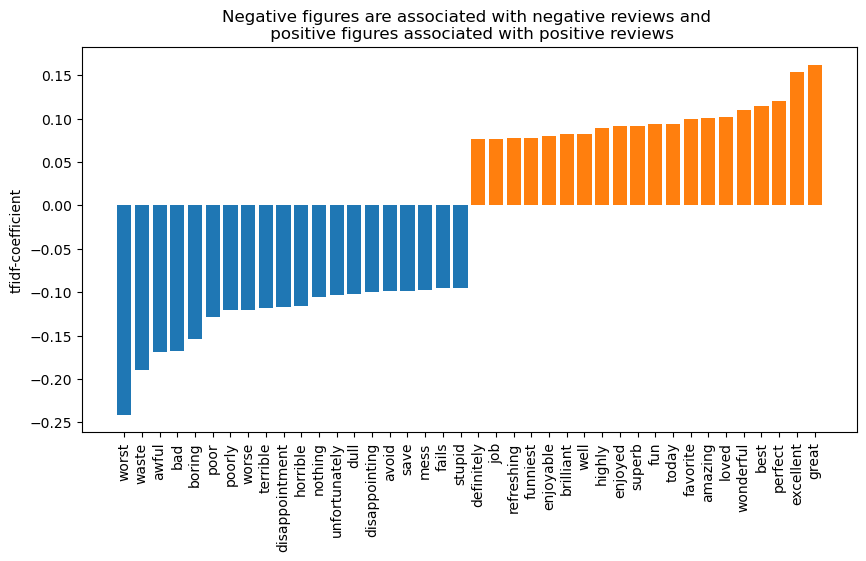

In [124]:
fig, ax= plt.subplots(figsize= (10, 5))
ax.bar(negative_top_feature_names, negative_top_20)
ax.bar(positive_top_feature_names, positive_top_20)
ax.set_xticklabels(labels= negative_top_feature_names.tolist() + positive_top_feature_names.tolist(), rotation= 90)
ax.set_title("Negative figures are associated with negative reviews and \n positive figures associated with positive reviews")
ax.set_ylabel("tfidf-coefficient")

In [125]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter= 1000))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
"tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3), (1,4), (1,5)]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: ", grid.best_score_)


Best cross-validation score:  0.9077999999999999


In [126]:
grid.best_params_

{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 4)}

In [130]:
grid_coefs= grid.best_estimator_.named_steps["logisticregression"].coef_
grid_feature_names= grid.best_estimator_.named_steps["tfidfvectorizer"].get_feature_names_out()

In [133]:
grid_top_negative_features= grid_feature_names[grid_coefs[0].argsort()[:30]]
grid_top_positive_features = grid_feature_names[grid_coefs[0].argsort()[-30:]]
grid_top_negative_coef= grid_coefs[0][grid_coefs[0].argsort()][:30]
grid_top_positive_coef= grid_coefs[0][grid_coefs[0].argsort()][-30:]


/var/folders/mm/vc73ccrd1pl1hf0_z819ftw00000gp/T/ipykernel_52146/2919522289.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels= grid_top_negative_features.tolist() + grid_top_positive_features.tolist(), rotation= 90)


Text(0, 0.5, 'tfidf-coefficient')

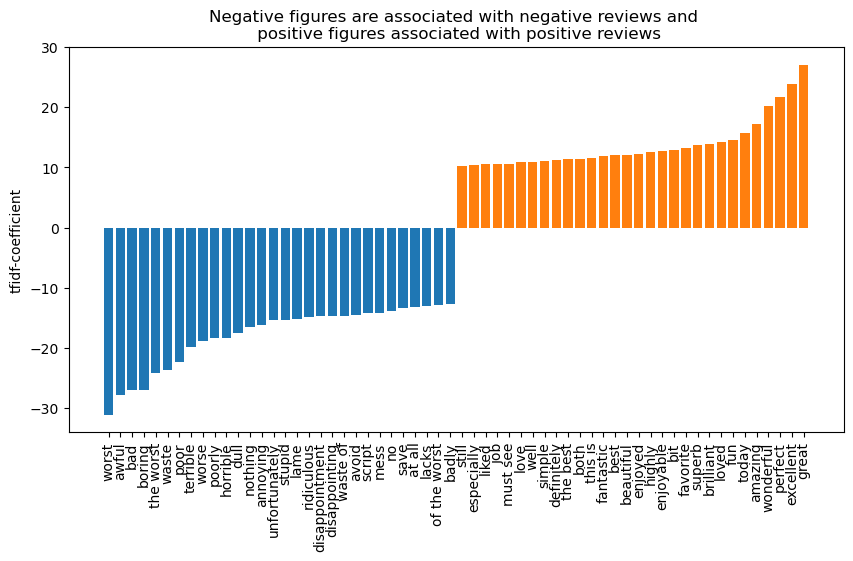

In [134]:
fig, ax= plt.subplots(figsize= (10, 5))
ax.bar(grid_top_negative_features, grid_top_negative_coef)
ax.bar(grid_top_positive_features, grid_top_positive_coef)
ax.set_xticklabels(labels= grid_top_negative_features.tolist() + grid_top_positive_features.tolist(), rotation= 90)
ax.set_title("Negative figures are associated with negative reviews and \n positive figures associated with positive reviews")
ax.set_ylabel("tfidf-coefficient")

In [147]:
en_nlp = spacy.load('en_core_web_sm')
regexp = re.compile('(?u)\\b\\w\\w+\\b')

def regexp_tokenizer(text):
    words = regexp.findall(text)
    return Doc(en_nlp.vocab, words=words)

en_nlp.tokenizer = regexp_tokenizer

def custom_tokenizer(document):
    doc_spacy = en_nlp(document, disable=['parser', 'ner'])
    return [token.lemma_ for token in doc_spacy]

lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5, token_pattern=None)

X_train_lemma = lemma_vect.fit_transform(text_train)
print("X_train_lemma.shape: ", X_train_lemma.shape)

X_train_lemma.shape:  (25000, 21581)


In [148]:
param_grid= {"C": [0.01, 0.1, 1, 10, 100]}
estimator= LogisticRegression(max_iter= 1000)
grid= GridSearchCV(estimator, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best estimator:  LogisticRegression(C=0.1, max_iter=1000)
Best score:  0.88788


In [149]:
grid.score(X_test, y_test)

0.87876

In [151]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

In [153]:
lda = LatentDirichletAllocation(
    n_components=10, 
    learning_method="batch", 
    max_iter=25, 
    random_state=0
)

topics = lda.fit_transform(X)

In [154]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic #{topic_idx}: "
        # Get the indices of the highest weights in the topic
        top_indices = topic.argsort()[: -n_top_words - 1 : -1]
        # Join the words together
        message += " ".join([feature_names[i] for i in top_indices])
        print(message)
    print()



In [155]:
# 1. Get feature names from your vectorizer
# Note: In newer scikit-learn, use get_feature_names_out()
tf_feature_names = lemma_vect.get_feature_names_out()

# 2. Call the function
print_top_words(lda, tf_feature_names, n_top_words=10)

Topic #0: andy fido inseparable cheat eroticism appliance americanize ing cal broderick
Topic #1: imprison inger hypochondriac emperor acknowledgement build cord inquire earthquake endlessly
Topic #2: coalesce beastiality confidant fiance deployment halo heretical clutch inherent 58
Topic #3: gilmore gaunt casey horrifically cash gingerbread earthquake gainey inquire dull
Topic #4: brightness fulci hers accusation compare 007 heretical impressionistic inasmuch commissioner
Topic #5: 4am cancer count arrogance emilio effectiveness broderick extremism gabrielle douche
Topic #6: defy bah 4am addendum ellington brute cocteau clutch 007 deflower
Topic #7: ill austen foundation dear egg broderick appliance ds9 inseparable barbarian
Topic #8: eroticism foundation dear 51 evidently cheng austen everytown fort dealer
Topic #9: coup count infinitum degrade colorado individuality combust commission booklet excerpt

